### Import Libraries

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [29]:
data = pd.read_csv('uber.csv')

In [30]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Clean the Data
Drop unnecessary columns like Unnamed: 0, key and pickup_datetime.
Remove rows with missing or invalid data

In [32]:
data = data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)

In [33]:
data = data.dropna()

In [34]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [35]:
data.isnull().sum().sum()

0

# Step 2: Identify Outliers

#### check the outliers in fare_amount

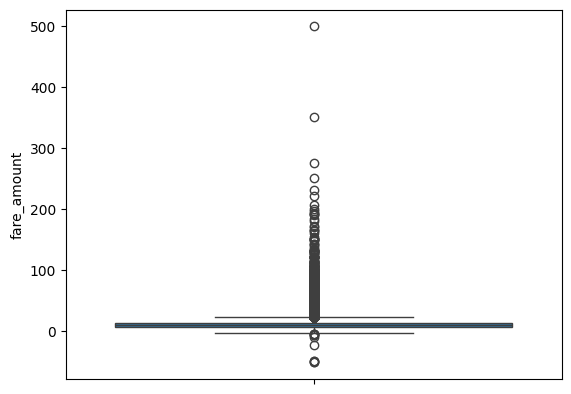

In [36]:
sns.boxplot(data['fare_amount'])
plt.show()

## Remove outliers

In [38]:
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] < 100)]

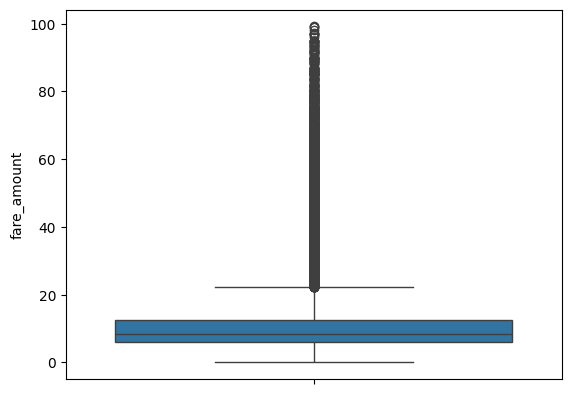

In [40]:
sns.boxplot(data['fare_amount'])
plt.show()

# Step 3: check correlation

### Find correlation between feature

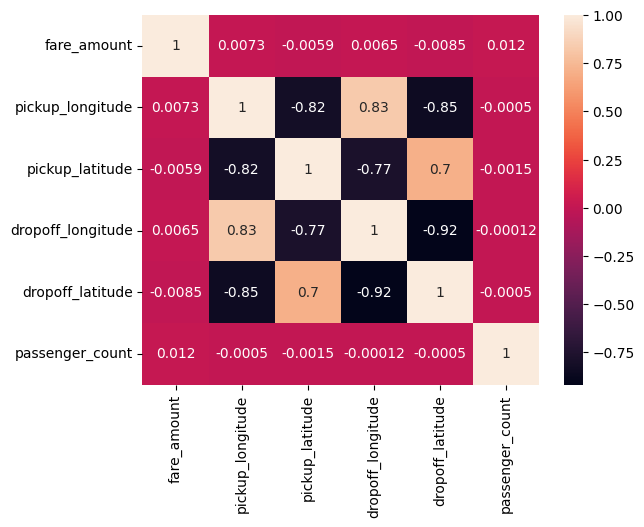

In [41]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Step 4: Build Models

Separate Features and Target

In [42]:
data.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [43]:
x = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 0, test_size = 0.25)

## Linear Regression

In [46]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred_linear = linear_model.predict(x_test)

# Random Forest Regression

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(x_train, y_train)

In [64]:
y_pred_rf  = random_forest_model.predict(x_test)

In [66]:
y_pred_rf

array([ 9.121,  9.268,  7.91 , ...,  7.675, 11.28 , 14.855])

# Step 5: Evalute Models

In [68]:
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [69]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [70]:
print("Linear Regression - R²:", r2_linear, "RMSE:", rmse_linear)
print("Random Forest - R²:", r2_rf, "RMSE:", rmse_rf)

Linear Regression - R²: -0.000154116411133165 RMSE: 9.346155676945054
Random Forest - R²: 0.7987008241902449 RMSE: 4.192958323497604
